In [1]:
from glob import glob
import matplotlib.pyplot as plt
import re

In [5]:
log_list = glob('logs/*.pth')

In [27]:
epoch = re.compile(r'(?<=Epoch)\d+\.?\d*')
tl = re.compile(r'(?<=Total_Loss)\d+\.?\d*')
vl = re.compile(r'(?<=Val_Loss)\d+\.?\d*')

logs = []
for log in log_list:
    log_data = []
    # epoch
    log_data += epoch.findall(log)
    # total loss
    log_data += tl.findall(log)
    # validation loss
    log_data += vl.findall(log)
    
    log_data = list(map(float,log_data))
    logs.append(log_data)

logs = sorted(logs)
logs[95:]

[[96.0, 1.8813, 2.0687],
 [97.0, 2.0026, 2.0626],
 [98.0, 1.9362, 2.0066],
 [99.0, 1.9625, 2.0381],
 [100.0, 1.9578, 2.093]]

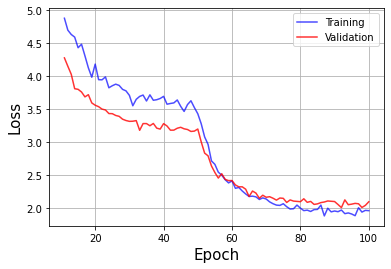

In [69]:
view = (0.1, 1.)

x = [i for i in range(1,101)]

train_loss = [logs[i][1] for i in range(len(logs))]
valid_loss = [logs[i][2] for i in range(len(logs))]

plt.figure()
plt.ylabel('Loss', fontsize=15 ,)
plt.xlabel('Epoch', fontsize=15)
plt.grid()

# set view
a = int(view[0]*len(x))
b = int(view[1]*len(x))
# plot
plt.plot(x[a:b], train_loss[a:b], 'blue', alpha=0.7, label='Training')
plt.plot(x[a:b], valid_loss[a:b], 'red', alpha=0.8, label='Validation')
plt.legend()

plt.show()